In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [18]:
df= pd.read_csv("twitter_training.csv")
df.head(3)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [19]:
df.columns=['ID', 'Game', 'Sentiment' , 'Comment']
df.head(2)

,ID,Game,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [20]:
df.isnull().sum()

ID             0
Game           0
Sentiment      0
Comment      686
dtype: int64

In [21]:
df[df["Comment"].isnull()]

,ID,Game,Sentiment,Comment
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [22]:
#Fill in the null values of the 'Comment' column that have Negative sentiments.
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Negative")]
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Negative")] = df[(df["Comment"].isnull()) &(df["Sentiment"]=="Negative")].fillna("I was really disappointed with this game.")


In [23]:
#Fill in the null values of the 'Comment' column that have Positive sentiments.
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Positive")]
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Positive")]=df[(df["Comment"].isnull()) & (df["Sentiment"]=="Positive")].fillna("Wow, this game is absolutely amazing!")



In [24]:
#Fill in the null values of the 'Comment' column that have neutral sentiments.
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Neutral")]
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Neutral")]=df[(df["Comment"].isnull()) &(df["Sentiment"]=="Neutral")].fillna("The game is okay")


In [25]:
#Fill in the null values of the 'Comment' column that have Irrelevant sentiments.
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Irrelevant")]
df[(df["Comment"].isnull()) &(df["Sentiment"]=="Irrelevant")]=df[(df["Comment"].isnull()) &(df["Sentiment"]=="Irrelevant")].fillna("Irrelevant comment")


In [26]:
df.isnull().sum()   

ID           0
Game         0
Sentiment    0
Comment      0
dtype: int64

In [27]:
# Now we have to analyze and visualize the sentiment patterns to understand public opinion

print("Total: ",df["Sentiment"].count(),"\n")              # Sentiment has total 74681 values including Positive, negative etc
positive_sentiment=df[df["Sentiment"]=="Positive"].count()    # but Sentiment has 20831 Positive values
print(positive_sentiment["Sentiment"])
negative_sentiment= df[df["Sentiment"]=="Negative"].count()   # //
print(negative_sentiment["Sentiment"])

neutral_sentiment=df[df["Sentiment"]=="Neutral"].count()         # //
print(neutral_sentiment["Sentiment"])

irrelevant_sentiment= df[df["Sentiment"]=="Irrelevant"].count()  # //
print(irrelevant_sentiment["Sentiment"])


Total:  74681 

20831
22542
18318
12990


<function matplotlib.pyplot.show(close=None, block=None)>

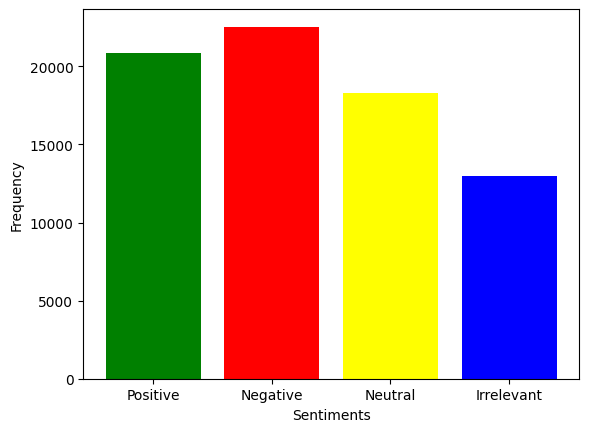

In [28]:
classes=["Positive", "Negative", "Neutral", "Irrelevant"]
counts=[positive_sentiment["Sentiment"],negative_sentiment["Sentiment"],neutral_sentiment["Sentiment"],irrelevant_sentiment["Sentiment"]]
plt.bar(classes,counts, color=["green", "Red", "yellow", "blue"])
plt.xlabel("Sentiments")
plt.ylabel("Frequency")
plt.show
# From the chart below, we can see that the majority of public comments about different games are negative


In [29]:
positive_sentiments_df=df[df["Sentiment"]=="Positive"]  # Finding the positive sentiment values
print(positive_sentiments_df["Game"].unique())

counts11=[]

# Finding the frequency of positive sentiment values for each Game
for  game in positive_sentiments_df["Game"].unique():
    freq=positive_sentiments_df['Game'].str.count(game).sum()
    counts11.append(freq)
counts11

np.array(counts11)
print(counts11)

game_list=[]
game_list=positive_sentiments_df["Game"].unique()


['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
[1019, 864, 312, 732, 0, 426, 582, 0, 738, 768, 360, 1446, 642, 618, 564, 606, 834, 594, 0, 528, 780, 504, 0, 1314, 528, 174, 0, 396, 270, 966, 618, 816]


<function matplotlib.pyplot.show(close=None, block=None)>

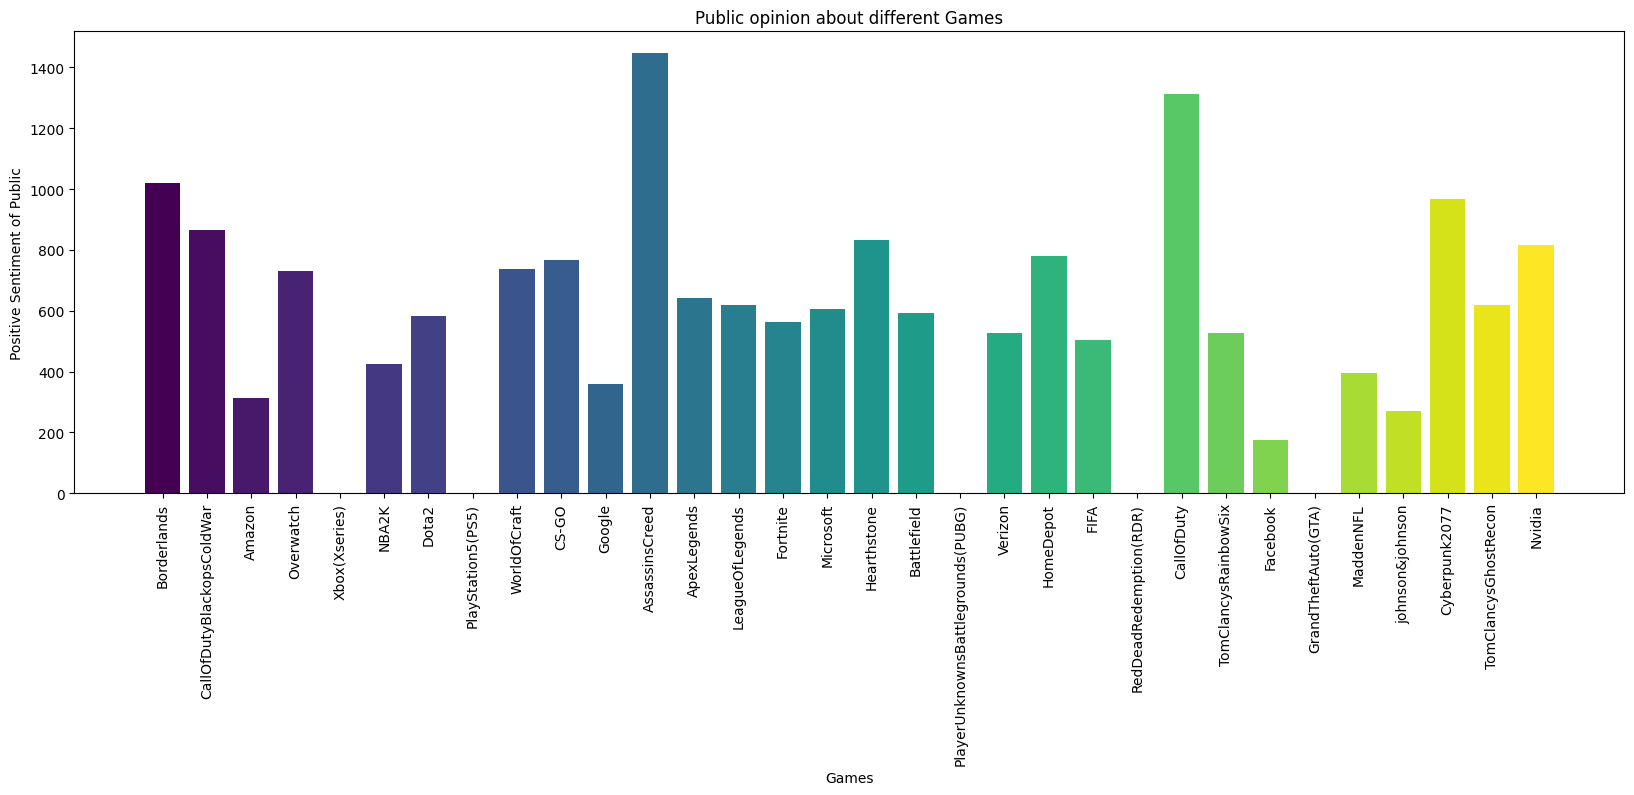

In [30]:
# Drawing a chart of all games having positive sentiments from the public
plt.figure(figsize=(20,6))

colors = plt.cm.viridis(np.linspace(0, 1, len(game_list)))  #This line generates multiple colors using the viridis colormap
plt.bar(game_list, counts11, color=colors)
plt.title("Public opinion about different Games")
plt.xticks(rotation=90) 
plt.xlabel("Games")
plt.ylabel("Positive Sentiment of Public")
plt.show

In [35]:
# Finding the frequency of Negative sentiment values for each Game
negative_sentiment_df=df[df["Sentiment"]=="Negative"]
negative_sentiment_df


counts12=[]

# Finding the frequency of Negative sentiment values for each Game
for  game in negative_sentiment_df["Game"].unique():
    freq2=negative_sentiment_df['Game'].str.count(game).sum()
    counts12.append(freq2)
counts11

np.array(counts12)
print(counts12)

game_list2=[]
game_list2=negative_sentiment_df["Game"].unique()
game_list2       

[426, 576, 576, 630, 0, 1476, 768, 0, 342, 348, 594, 378, 600, 642, 702, 774, 528, 474, 0, 1098, 900, 1176, 0, 1470, 1122, 720, 0, 1710, 846, 390, 900, 522]


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

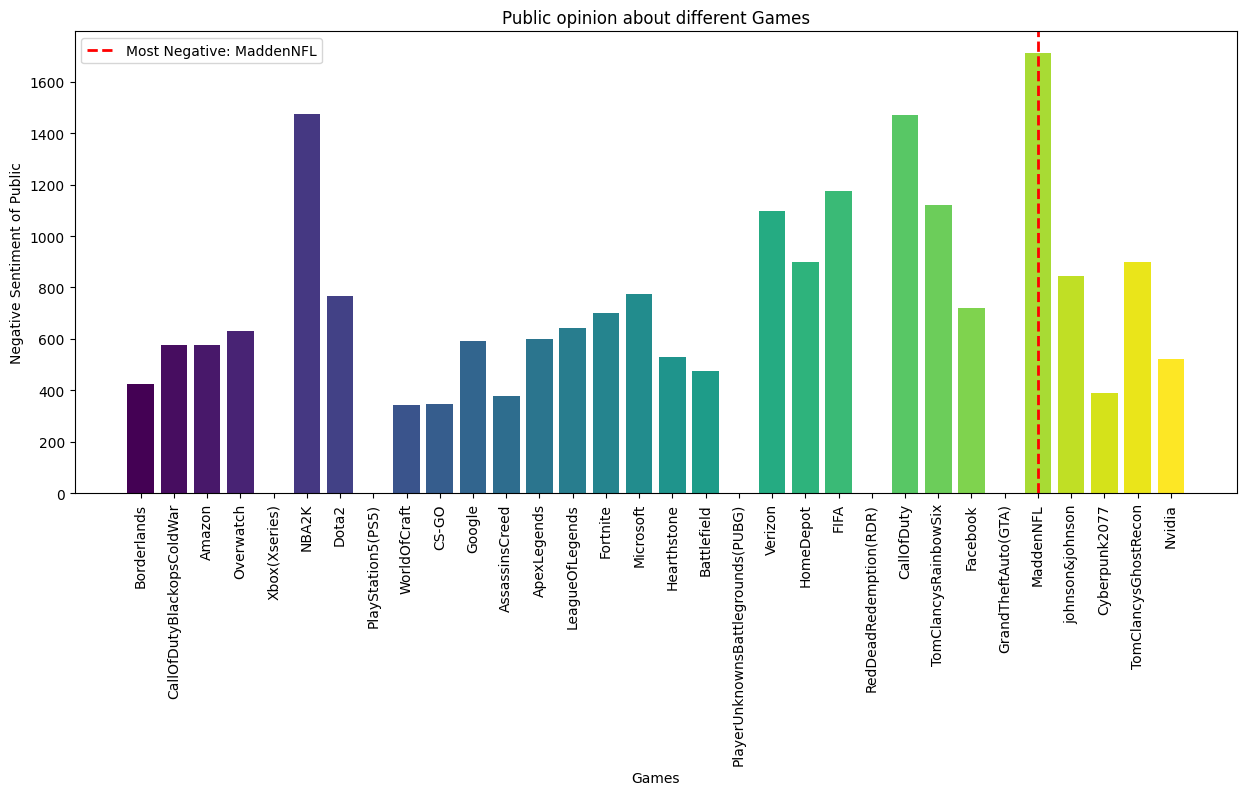

Most negative sentiments are on   MaddenNFL


In [41]:

# Find the index of the game with the most negative sentiments
max_neg_index = np.argmax(counts12)
most_negative_game = game_list2[max_neg_index]

# Drawing a chart of all games having Negative sentiments from the public
plt.figure(figsize=(15,6))

colors = plt.cm.viridis(np.linspace(0, 1, len(game_list2)))  #This line generates multiple colors using the viridis colormap
plt.bar(game_list2, counts12, color=colors)
plt.title("Public opinion about different Games")
plt.xticks(rotation=90) 
plt.xlabel("Games")
plt.ylabel("Negative Sentiment of Public")

# Draw a vertical line at the most negative entity
plt.axvline(x=max_neg_index, color='red', linestyle='--', linewidth=2, label=f'Most Negative: {most_negative_game}')

plt.legend()
plt.show()


print("Most negative sentiments are on  ",most_negative_game)